<img src="https://logodownload.org/wp-content/uploads/2017/09/mackenzie-logo.png" height="200" width="200" align="left">
<br><br><br>

CURSO: CIENCIA DE DADOS.<br>
COMPONENTE CURRICULAR:  PROJETO APLICADO II.<br>
SEMESTRE: 2023/2.<br>
PROFESSOR: ANDERSON ADAIME DE BORBA.<br><br>
ALUNOS: 
- LEONARDO DOS REIS OLHER - TIA: 22510249;
- THAINÁ VIEIRA DOS SANTOS - TIA: 22500081;
- VINICIUS CAUMO SEGATTO - TIA: 22506861;
- NICOLAS PINOTTI - TIA 22514112;
- VINÍCIUS VIEIRA DA CUNHA OLIVEIRA - TIA: 22505865.



## 1 IMPORTS

In [1]:
import pandas as pd
import numpy as np
from statistics import mode
import matplotlib.pyplot as plt
import seaborn as sns

## 2 READ CSV

In [2]:
df = pd.read_csv('ds_salaries.csv')
df.head(5)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


## 3 INFORMAÇÕES DADOS

### 3.1 DADOS QUE PRECISAM DE TRATAMENTO

In [3]:
# VALORES NULOS
print(df.isnull().sum(), end='\n\n')

# TIPO DADOS
print(df.dtypes, end='\n\n')

# TAMANHO DATA-FRAME
print(df.shape)

# DESCRIBE DATA-FRAME
display(df.describe())

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

(607, 12)


,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


### 3.2 VISUALIZAR DADOS

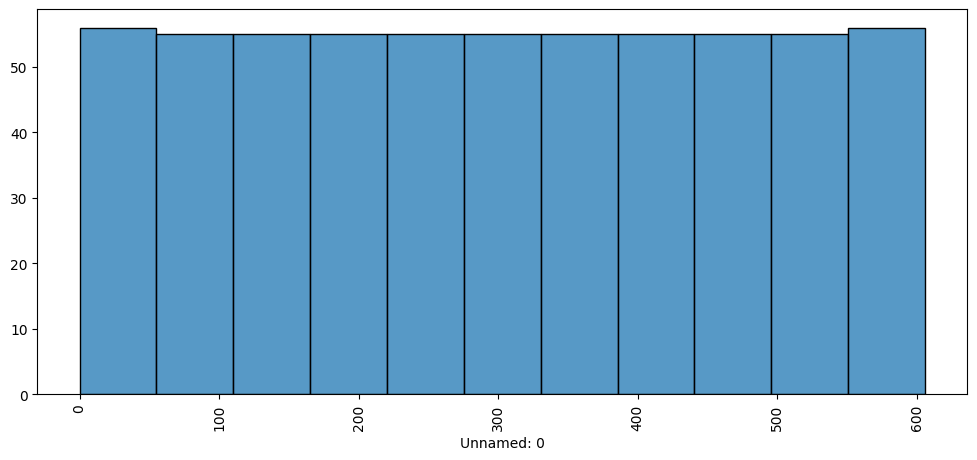

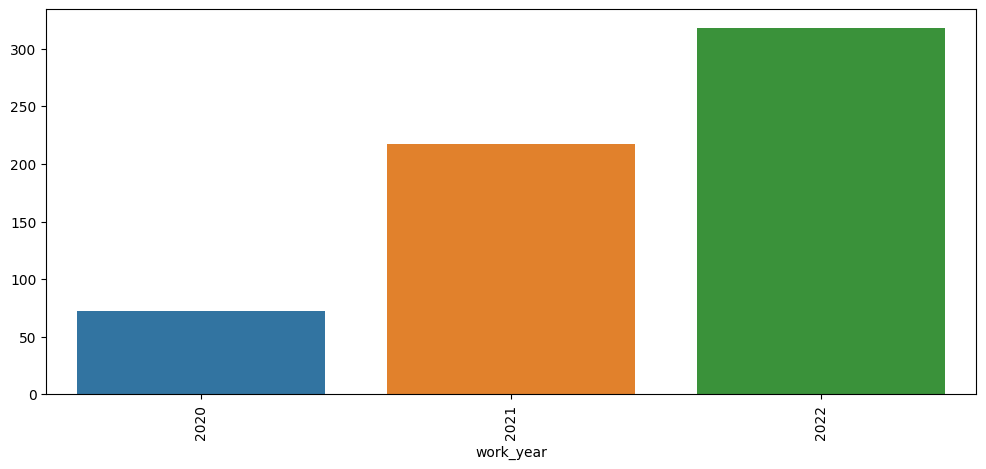

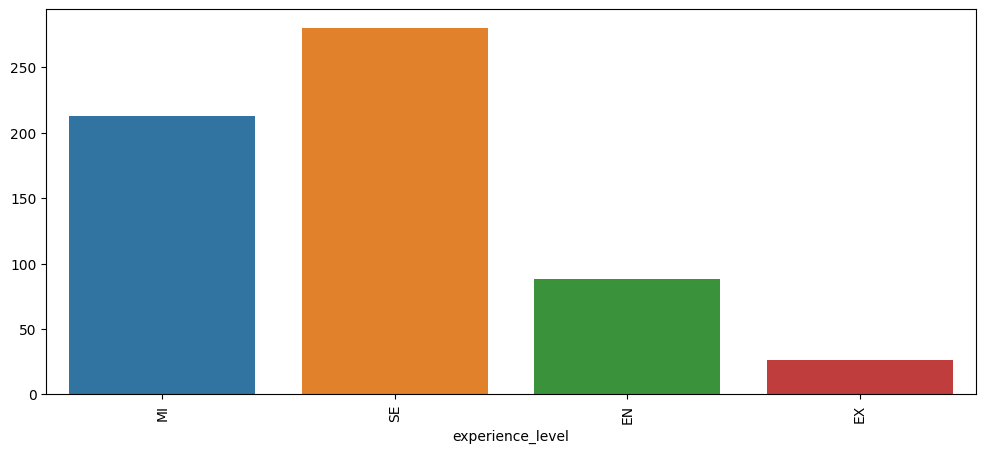

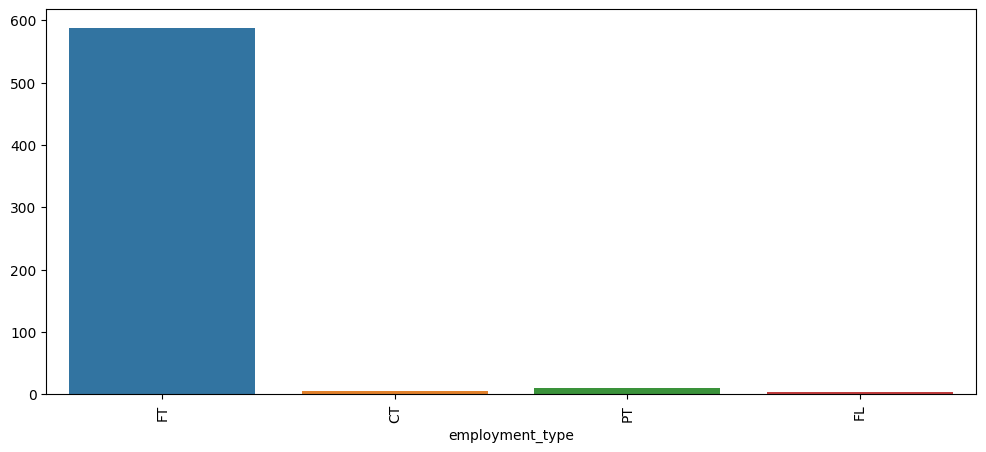

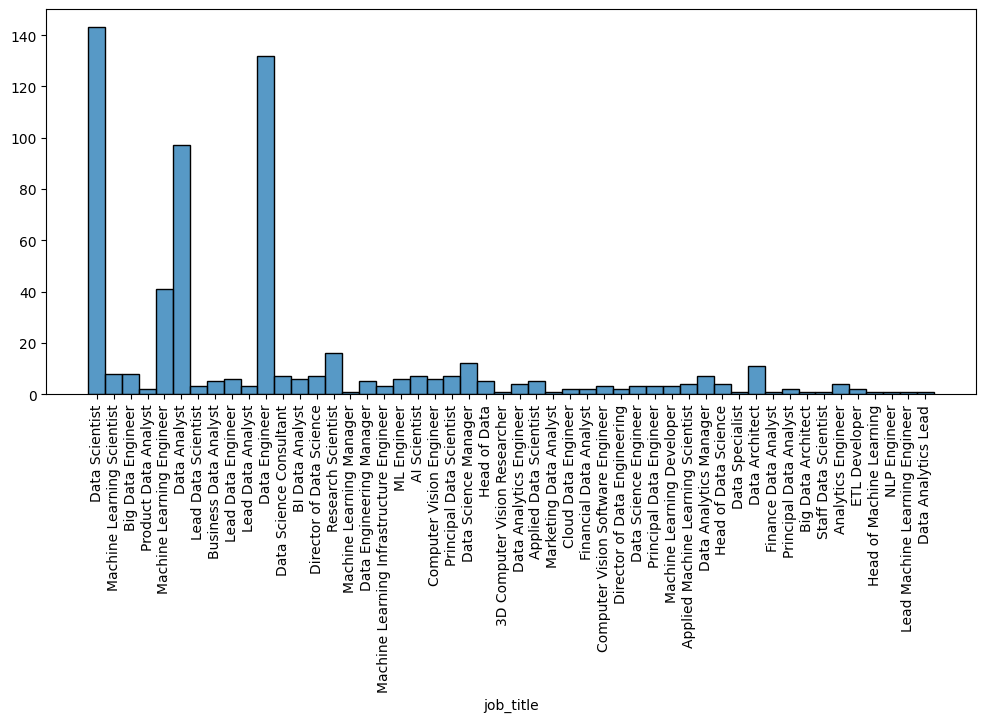

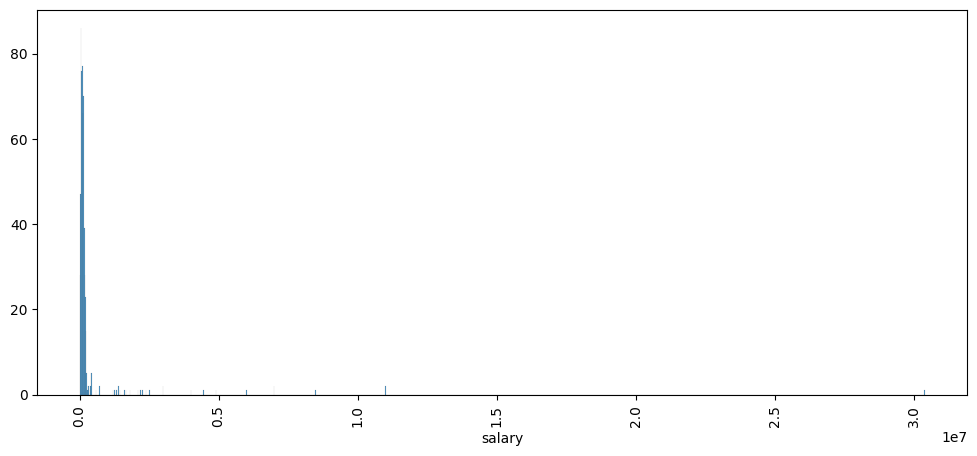

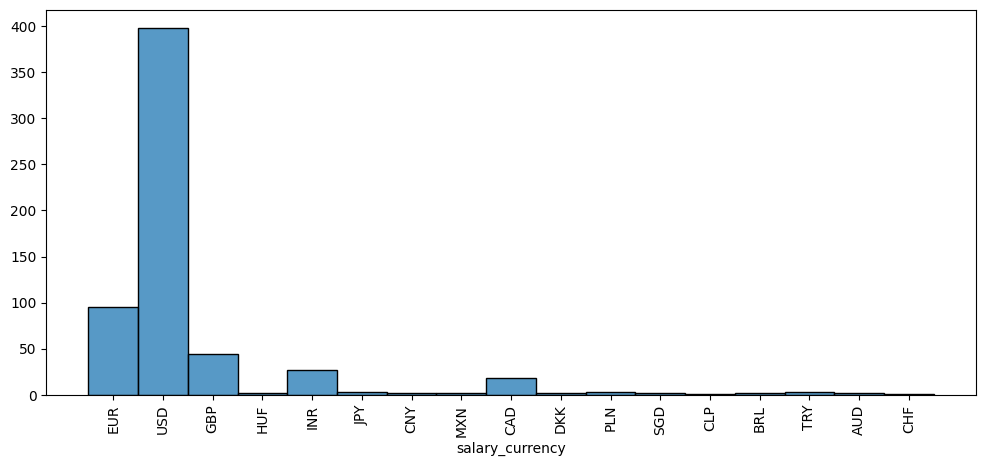

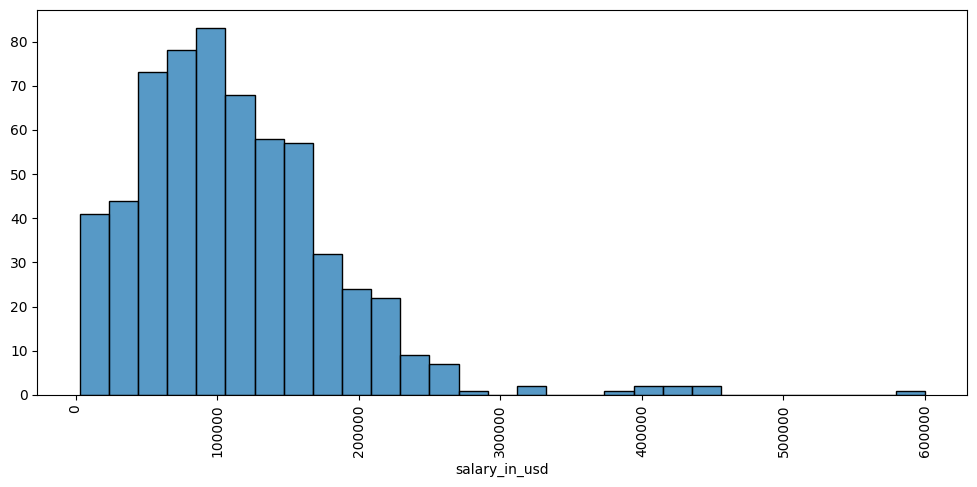

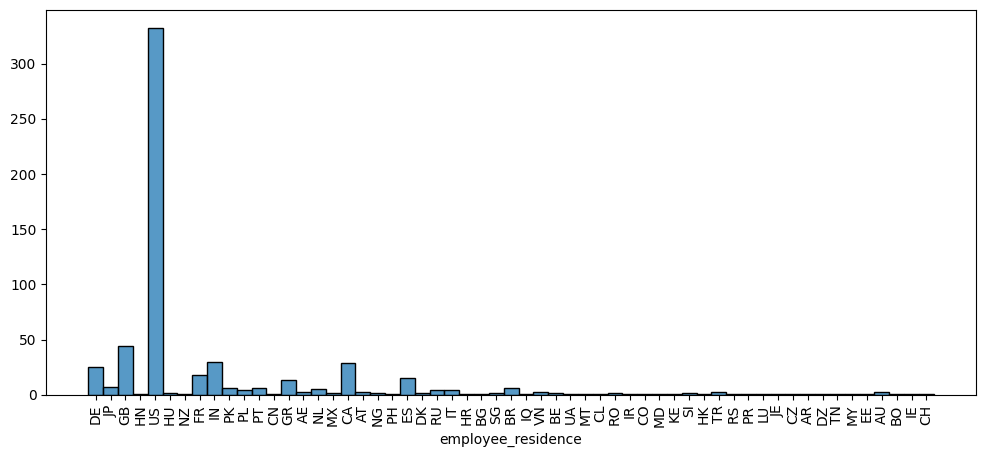

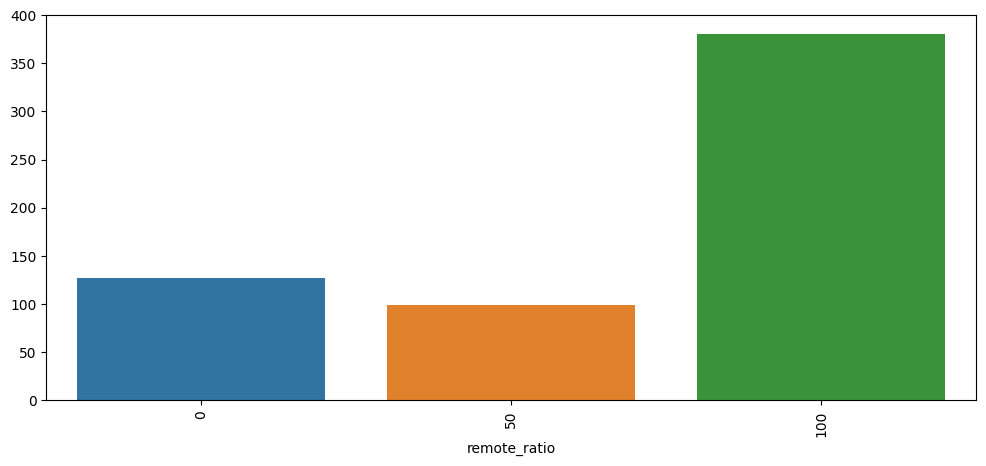

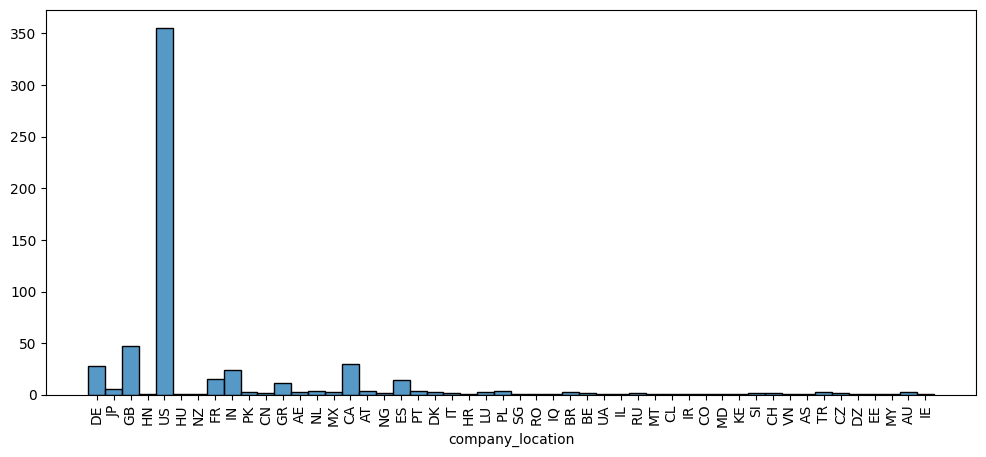

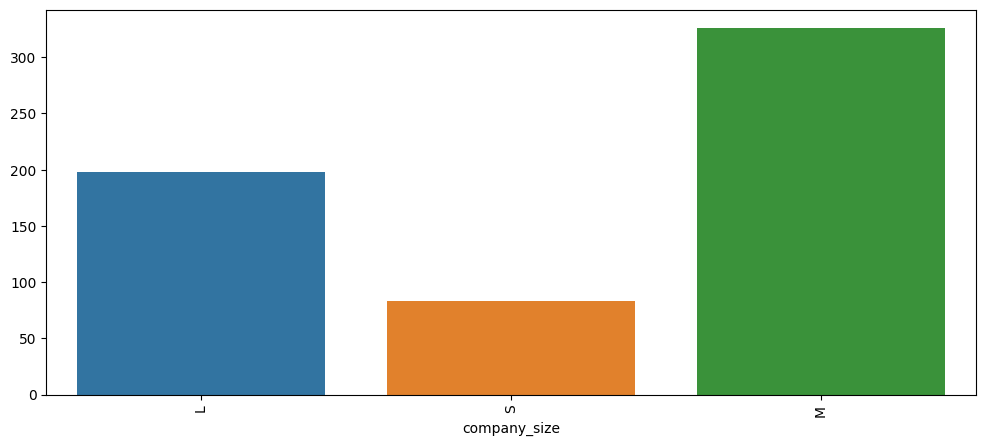

In [4]:
for col in df.columns.unique():
    if len(df[col].unique()) > 10:
        fig, ax = plt.subplots(figsize=(12,5))
        sns.histplot(x=df[col])   
    else:
        fig, ax = plt.subplots(figsize=(12,5))
        sns.countplot(x=df[col])
    plt.ylabel('')
    plt.xticks(rotation=90)
    plt.show()

## 4 DROP INFOS

### 4.1 REMOVER LINHAS
* Cargos diferentes de Analista de Dados.

In [5]:
df = df[df['job_title'].str.contains('data analyst', case=False)]

### 4.2 REMOVER COLUNAS
* ID;
* Salario com moeda Local;
* Nome moeda local;
* Titulo do Cargo de trabalho.

In [6]:
drops = ['Unnamed: 0', 'salary_currency', 'salary','job_title']
df.drop(drops, axis=1, inplace=True)

## 5 AJUSTE DE DADOS

### 5.1 RENOMEAR COLUNAS
* work_year: year.
* experience_level: experience.
* salary_in_usd: salary.
* employee_residence: residence.
* remote_ratio: remote.

In [7]:
df.rename(columns={'work_year':'year'
                  ,'experience_level':'experience'
                  ,'salary_in_usd':'salary'
                  ,'employee_residence':'residence'
                  ,'remote_ratio':'remote'
                  }, inplace= True)

### 5.2 TRABALHO REMOTO
* No Remote: Até 20% do trabalho é feito remoto.
* Partially: Até 80% do trabalho é feito remoto.
* Remote: Mais de 80% do trabalho é feito remoto.

In [8]:
df['remote'] = np\
    .where(df['remote'] < 20, 'No remote', np\
    .where(df['remote'] < 80, 'Partially', 'Remote'))

### 5.3 NIVEL EXPERIENCIA
* EN ➟ Entry
* MI ➟ Junior
* SE ➟ Intermediante
* EX ➟ Senior

In [9]:
df['experience'].replace({'EN':'1 - Entry'
                         ,'MI':'2 - Junior'
                         ,'SE':'3 - Intermediate'
                         ,'EX':'4 - Senior'}, inplace=True)

### 5.4 TIPO DE EMPREGO
* FT ➟ Full-Time
* CT ➟ Contratante
* FL ➟ Freelancer
* PT ➟ Meio_periodo

In [10]:
df['employment_type'] = np\
    .where(df['employment_type'] == 'FT', 'Full-Time', np\
    .where(df['employment_type'] == 'CT', 'Contratante', np\
    .where(df['employment_type'] == 'FL', 'Freelancer', np\
    .where(df['employment_type'] == 'PT', 'Meio_periodo', '-'))))

### 5.5 TAMANHO DA EMPRESA
* L ➟ Grande
* M ➟ Média
* S ➟ Pequena

In [11]:
df['company_size'] = np\
    .where(df['company_size'] == 'L', '3 - Grande', np\
    .where(df['company_size'] == 'M', '2 - Média', np\
    .where(df['company_size'] == 'S', '1 - Pequena', '-')))

### 5.6 IMIGRANTES

Residentes fora do pais em que a empresa esta localizada.

In [12]:
df['imigrante'] = df['company_location'] != df['residence']

## 6 ANALISE SALARIAL

### 6.1 GROUP BY

In [13]:
cols = ['year', 'experience', 'residence', 'remote', 'company_location', 'company_size', 'employment_type', 'imigrante']
groups = {}

for col in cols:
    groups[col] = df\
        .groupby(col, as_index=False)\
        .agg({'salary': 'mean'})


### 6.2 HISTOGRAMA

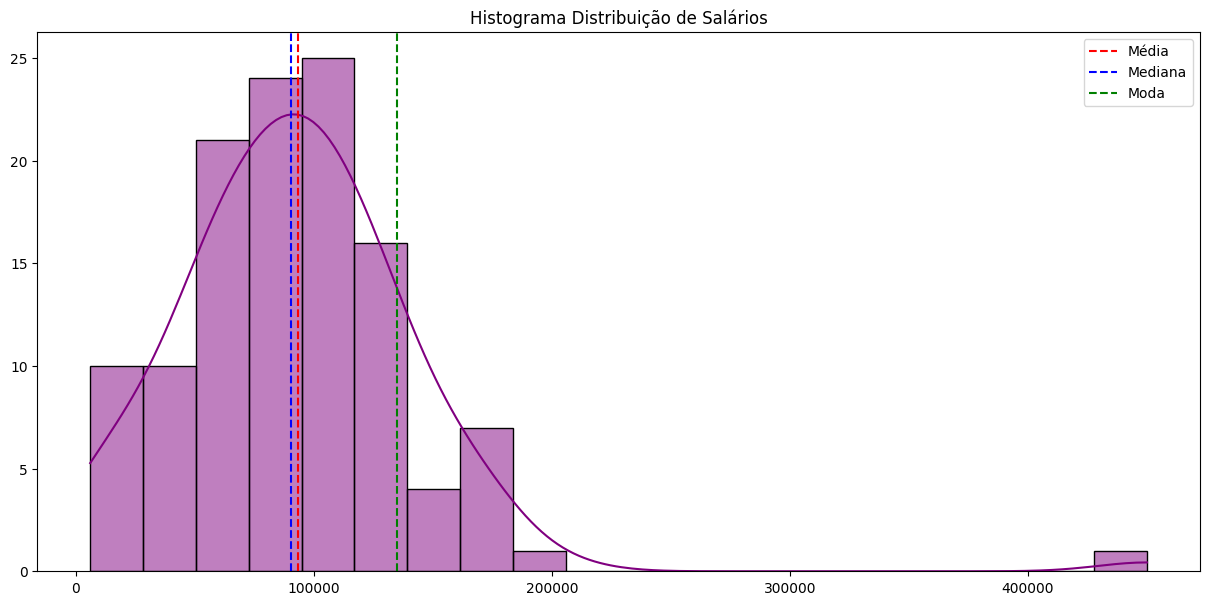

In [14]:
fig, _ = plt.subplots(figsize=(15,7))
sns.histplot(data=df, x='salary', kde=True, color='purple')
plt.axvline(df['salary'].mean(), color='red', linestyle='--', label='Média')
plt.axvline(df['salary'].median(), color='blue', linestyle='--', label='Mediana')
plt.axvline(mode(df['salary']), color='green', linestyle='--', label='Moda')
plt.xlabel('')
plt.ylabel('')
plt.title('Histograma Distribuição de Salários')
plt.legend()
plt.show()

### 6.3 ANALISE POR SALARIO

<p style="text-align: justify">
Durante o período de 2020 a 2022, uma análise detalhada dos salários no setor de Analista de Dados revelou uma tendência consistente de crescimento. Esse aumento sugere um aumento na valorização e demanda por profissionais qualificados nesse campo específico. </p>
    
<p style="text-align: justify"> O salário para Analistas de Dados apresentou um notável crescimento em 2021, registrando uma impressionante alta de quase 60% em relação a 2020 e pouco mais de 5% de diferença entre 2021 para 2022. </p>

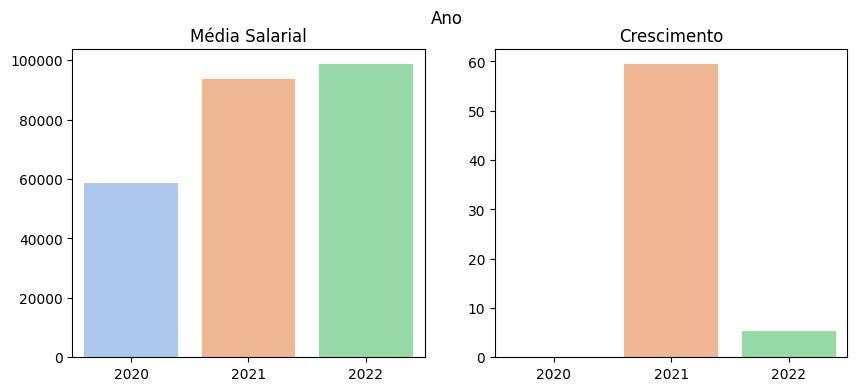

In [15]:
sns.set_palette("pastel") # CORES PADRÕES GRAFICOS

# CRESCIMENTO POR ANO
groups['year']['crescimento'] = groups['year']['salary'].pct_change().mul(100)

fig, ax = plt.subplots(1, 2, figsize=(10,4))
sns.barplot(ax=ax[0], data=groups['year'], x='year', y='salary')
sns.barplot(ax=ax[1], data=groups['year'], x='year', y='crescimento')
fig.suptitle('Ano')
ax[0].set_title('Média Salarial')
ax[1].set_title('Crescimento')
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[0].set_ylabel('')
ax[1].set_ylabel('')

plt.show()

### 6.4 ANALISE POR EXPERIÊNCIA

<p style="text-align: justify">
É notável a correlação direta entre o nível de senioridade e os salários dos analistas de dados. Conforme os profissionais ascendem na hierarquia de senioridade, observamos um crescimento consistente em seus ganhos.</p>
<p style="text-align: justify">
Um ponto de destaque é a notável diferença entre os níveis Junior e Intermediário de quase 45% de aumento na media salarial. A transição deste estágio inicial para um nível mais avançado na carreira de analista de dados representa um aumento significativo nos salários. Este salto é indicativo não apenas da aquisição de novas habilidades e competências, mas também da contribuição crescente dos profissionais para as atividades analíticas da organização.</p>

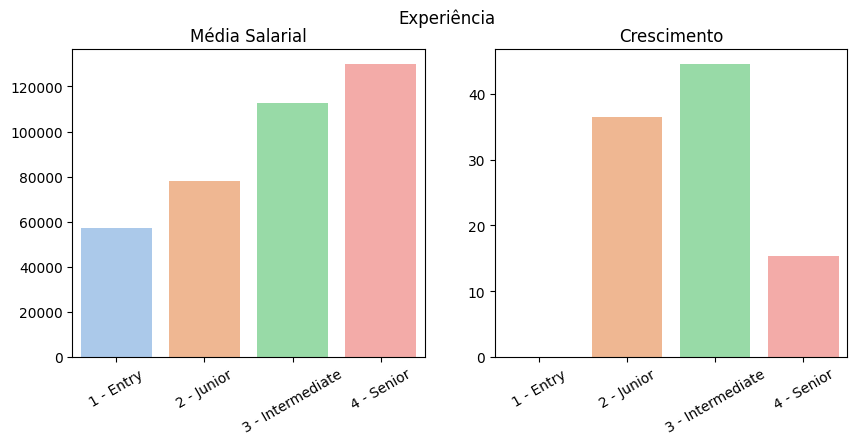

In [16]:
# CRESCIMENTO POR EXPERIÊNCIA
groups['experience']['crescimento'] = groups['experience']['salary'].pct_change().mul(100)

fig, ax = plt.subplots(1, 2, figsize=(10,4))
sns.barplot(ax=ax[0], data=groups['experience'], x='experience', y='salary')
sns.barplot(ax=ax[1], data=groups['experience'], x='experience', y='crescimento')

fig.suptitle('Experiência')
ax[0].set_title('Média Salarial')
ax[1].set_title('Crescimento')
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[0].set_ylabel('')
ax[1].set_ylabel('')

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=30)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=30)

plt.show()

### 6.5 ANALISE POR TIPO DA VAGA / TAMANHO DA EMPRESA / TIPO DE CONTRATO
<p style="text-align: justify">
Evidentemente as vagas de trabalho remotas apresentam, em média, um salario medio superior. No entanto, é importante ressaltar que essa diferença estatística pode ser atribuída, em parte, à presença de alguns casos de outliers.</p>

<p style="text-align: justify">
Empresas de médio porte tendem a oferecer, em média, salários mais elevados em comparação às de menor e de maior porte. No entanto, é importante notar que existem casos atípicos em empresas de grande porte, onde os salários podem exceder consideravelmente a média convencional. Esses casos representam uma exceção à tendência geral e demonstram que em organizações maiores, há potencial para remunerações significativamente mais elevadas.</p>
<p style="text-align: justify">
Temos uma quantidade limitada de informações sobre contratos de meio período e o tipo de contratante, o que pode potencialmente gerar algumas interpretações equivocadas. No entanto, mesmo com essa limitação, observa-se que os contratos de meio período apresentam uma remuneração significativamente inferior à média dos demais tipos de contrato. Em contrapartida, o tipo de contratante demonstra uma média ligeiramente superior em relação aos contratos em tempo integral.</p>

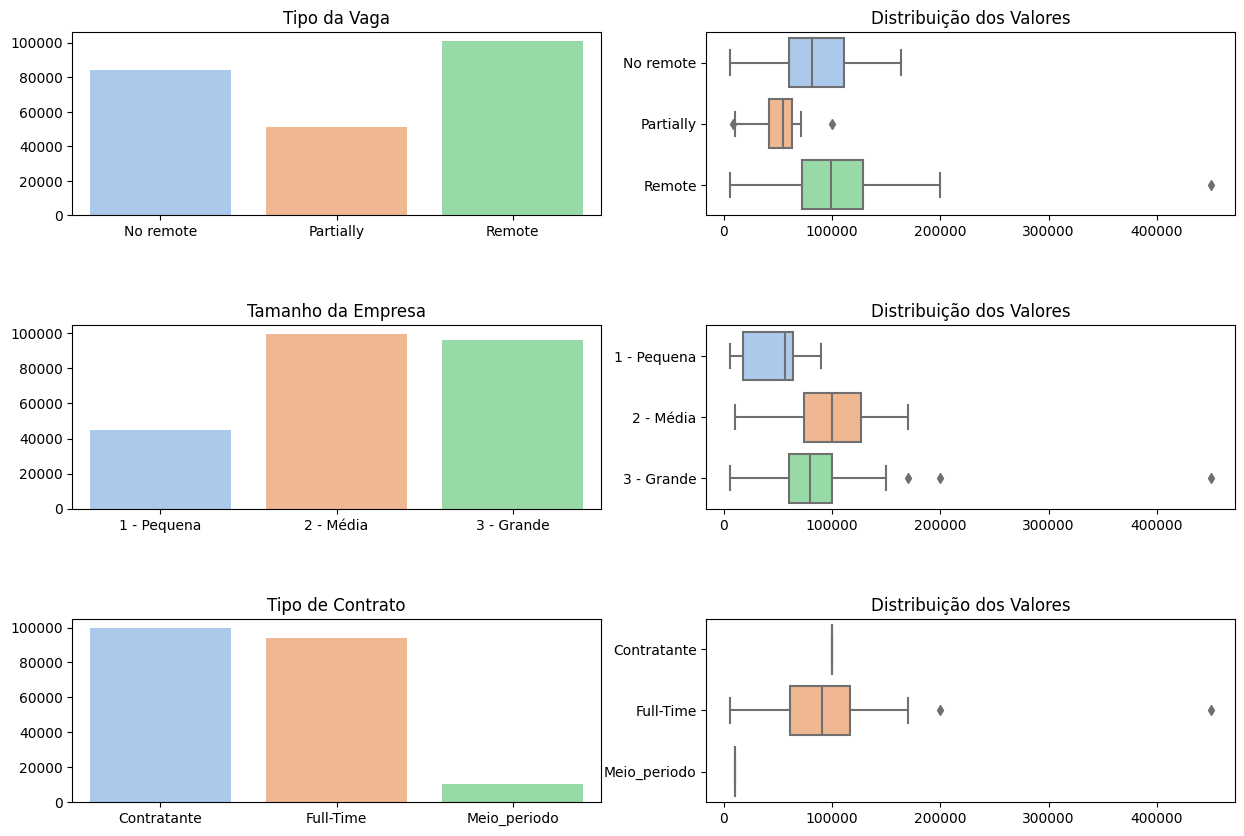

In [17]:
fig, ax = plt.subplots(3, 2, figsize=(15,10))

sns.barplot(ax=ax[0,0], data=groups['remote'].sort_values(by='remote'), x='remote', y='salary')
sns.boxplot(ax=ax[0,1], data=df.sort_values(by='remote'), x='salary', y='remote')
ax[0,0].set_title('Tipo da Vaga')
ax[0,1].set_title('Distribuição dos Valores')

sns.barplot(ax=ax[1,0], data=groups['company_size'].sort_values(by='company_size'), x='company_size', y='salary')
sns.boxplot(ax=ax[1,1], data=df.sort_values(by='company_size'), x='salary', y='company_size')
ax[1,0].set_title('Tamanho da Empresa')
ax[1,1].set_title('Distribuição dos Valores')

sns.barplot(ax=ax[2,0], data=groups['employment_type'].sort_values(by='employment_type'), x='employment_type', y='salary')
sns.boxplot(ax=ax[2,1], data=df.sort_values(by='employment_type'), x='salary', y='employment_type')
ax[2,0].set_title('Tipo de Contrato')
ax[2,1].set_title('Distribuição dos Valores')

ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('')
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('')
ax[1,0].set_xlabel('')
ax[1,0].set_ylabel('')
ax[1,1].set_ylabel('')
ax[1,1].set_xlabel('')
ax[2,0].set_ylabel('')
ax[2,0].set_xlabel('')
ax[2,1].set_ylabel('')
ax[2,1].set_xlabel('')


plt.subplots_adjust(hspace=0.6)
plt.show()

### 6.6 ANALISE POR PAÍS
<p style="text-align: justify">
A análise realizada destaca que os Estados Unidos se destacam como o país com o maior numero de dados de profissionais atuando na área de Ciência de Dados. Além disso, apresenta-se como a nação com o mais elevado salário médio nesse campo, e é onde se concentra a população com os salários médios mais altos em comparação com outras partes do globo. No entanto, é importante notar que a análise também aponta a diferença entre os salários médios dos imigrantes (menor) e não-imigrantes (maior).
</p>

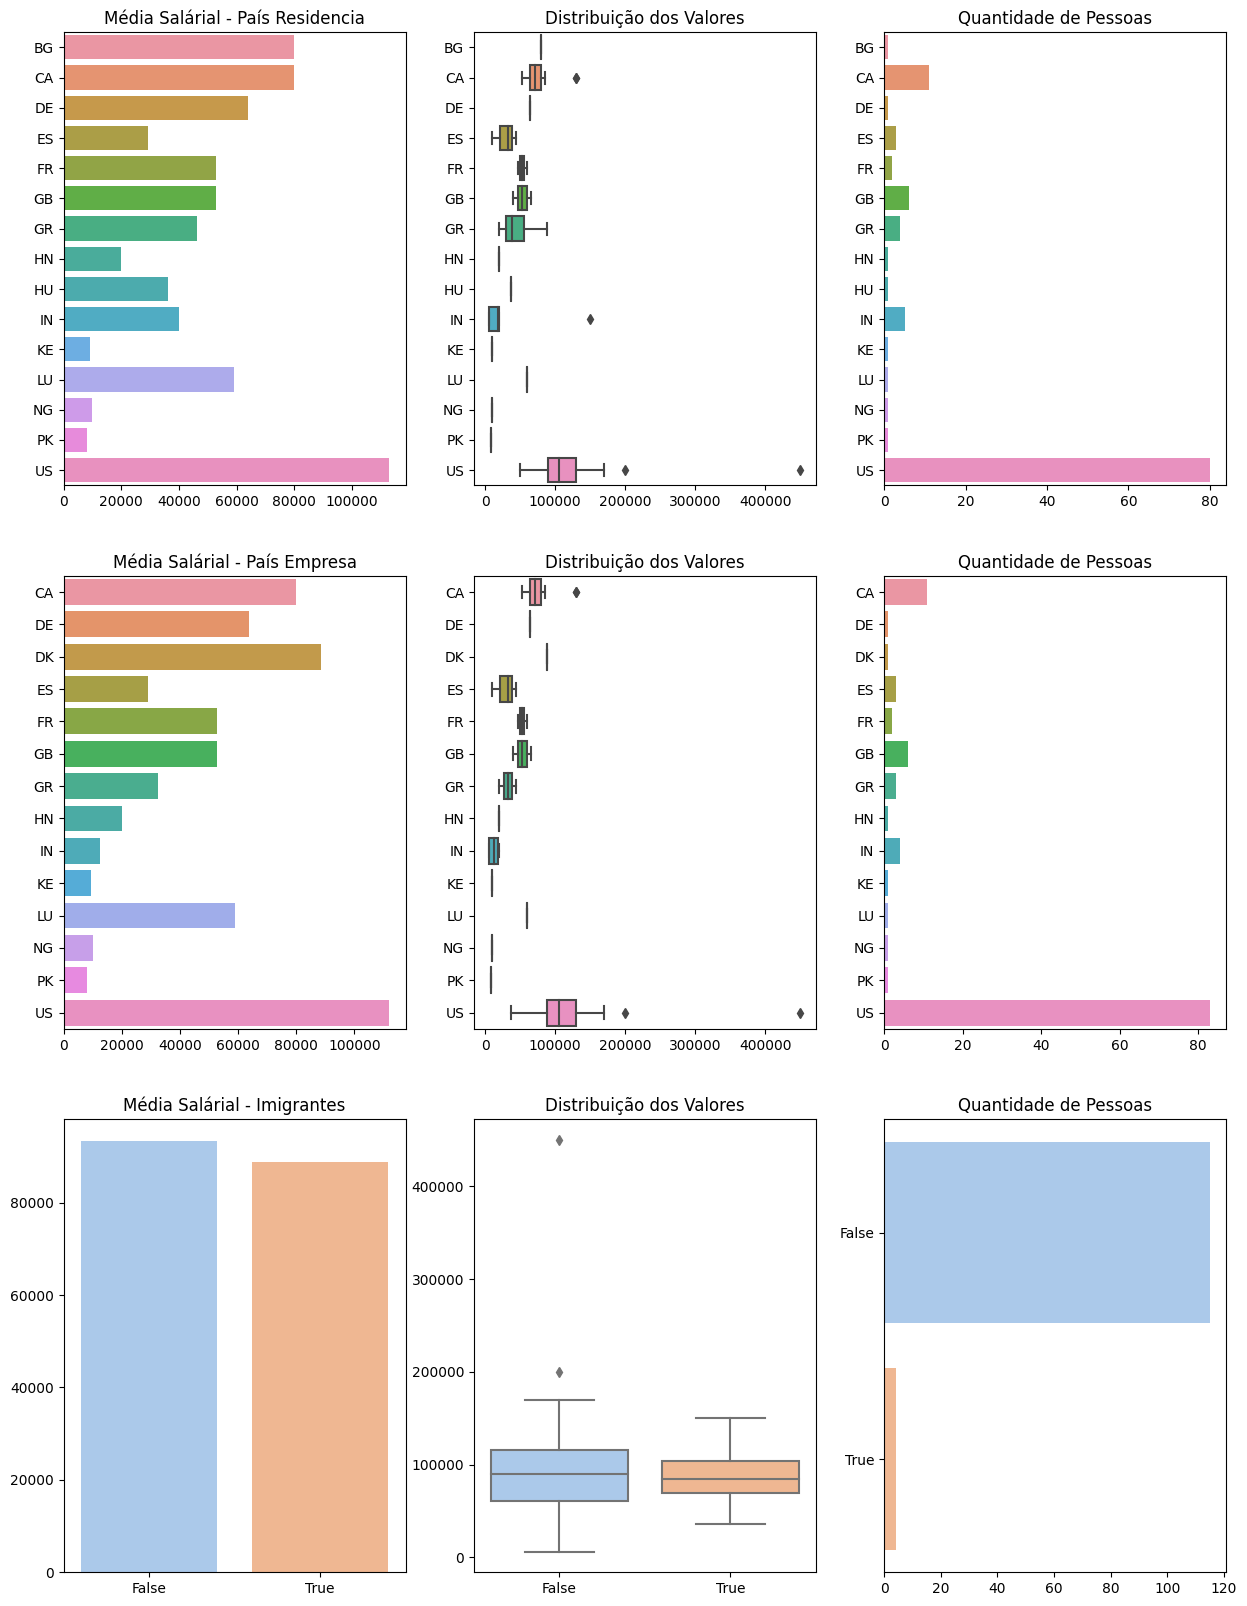

In [18]:
fig, ax = plt.subplots(3,3,figsize=(15,20))
sns.barplot(ax=ax[0,0], data=groups['residence'].sort_values(by='residence'), x='salary', y='residence')
sns.boxplot(ax=ax[0,1], data=df.sort_values(by='residence'), x='salary', y='residence')
sns.countplot(ax=ax[0,2], data=df.sort_values(by='residence'), y='residence')
ax[0,0].set_title('Média Salárial - País Residencia')
ax[0,1].set_title('Distribuição dos Valores')
ax[0,2].set_title('Quantidade de Pessoas')

sns.barplot(ax=ax[1,0], data=groups['company_location'].sort_values(by='company_location'), x='salary', y='company_location')
sns.boxplot(ax=ax[1,1], data=df.sort_values(by='company_location'), x='salary', y='company_location')
sns.countplot(ax=ax[1,2], data=df.sort_values(by='company_location'), y='company_location')
ax[1,0].set_title('Média Salárial - País Empresa')
ax[1,1].set_title('Distribuição dos Valores')
ax[1,2].set_title('Quantidade de Pessoas')

sns.barplot(ax=ax[2,0], data=groups['imigrante'].sort_values(by='imigrante'), x='imigrante', y='salary')
sns.boxplot(ax=ax[2,1], data=df.sort_values(by='imigrante'), x='imigrante', y='salary')
sns.countplot(ax=ax[2,2], data=df.sort_values(by='imigrante'), y='imigrante')
ax[2,0].set_title('Média Salárial - Imigrantes')
ax[2,1].set_title('Distribuição dos Valores')
ax[2,2].set_title('Quantidade de Pessoas')

ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('')
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('')
ax[0,2].set_xlabel('')
ax[0,2].set_ylabel('')
ax[1,0].set_xlabel('')
ax[1,0].set_ylabel('')
ax[1,1].set_ylabel('')
ax[1,1].set_xlabel('')
ax[1,2].set_ylabel('')
ax[1,2].set_xlabel('')
ax[2,0].set_xlabel('')
ax[2,0].set_ylabel('')
ax[2,1].set_ylabel('')
ax[2,1].set_xlabel('')
ax[2,2].set_ylabel('')
ax[2,2].set_xlabel('')

plt.show()

## 7 CORRELAÇÃO E SIGNIFICÂNCIA

### 7.1 DISPERSÃO E REGRESSÃO LINEAR

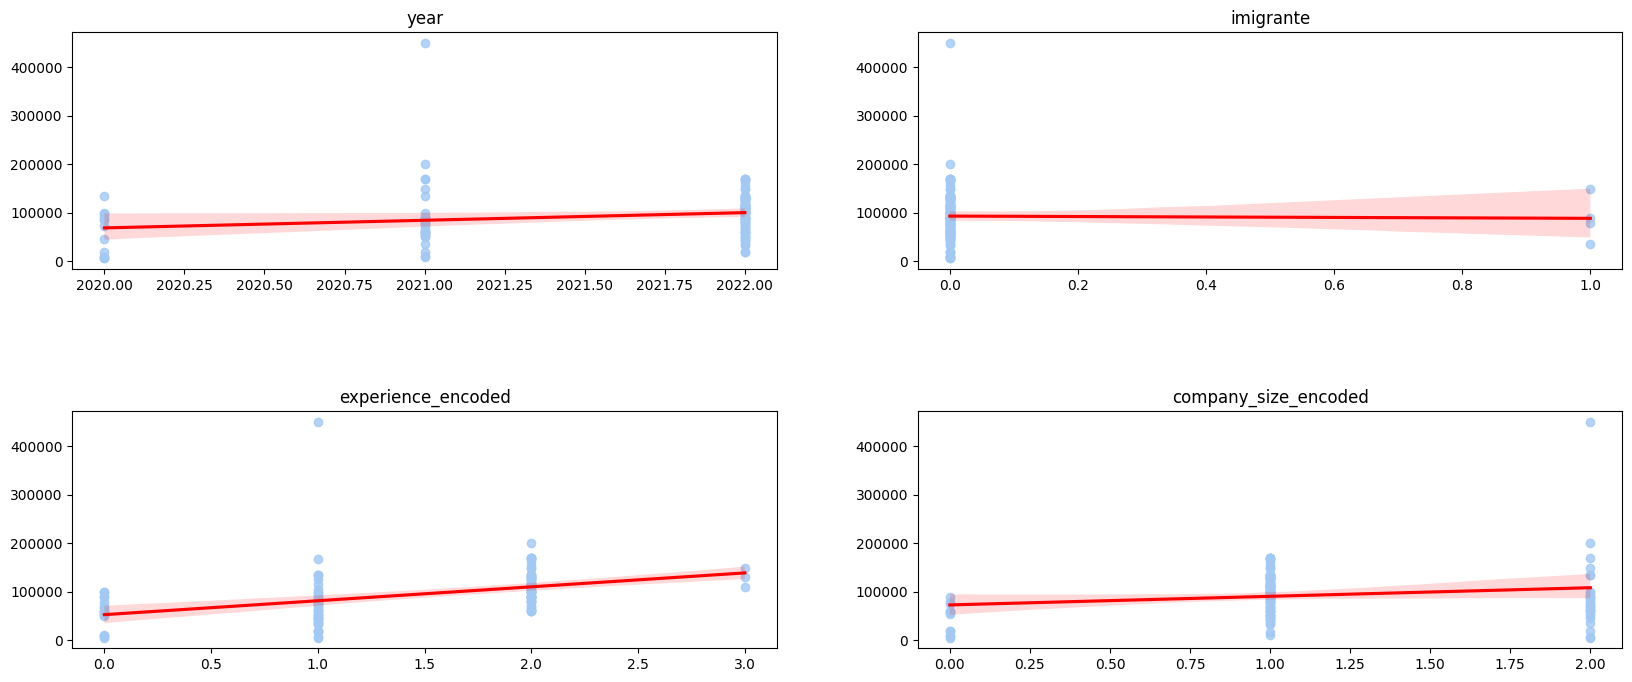

In [19]:
from sklearn.preprocessing import LabelEncoder

df['experience_encoded'] = LabelEncoder().fit_transform(X=df['experience'])
df['company_size_encoded'] = LabelEncoder().fit_transform(X=df['company_size'])

cols = ['year', 'imigrante', 'experience_encoded', 'company_size_encoded']

fig, ax = plt.subplots(2,2, figsize=(20,8))
n = 0
for i, col in enumerate(cols):
    if i % 2 == 0:
        sns.regplot(ax=ax[n,0], data=df, x=col, y='salary', line_kws={'color':'red'})
        sns.regplot(ax=ax[n,1], data=df, x=cols[i+1], y='salary', line_kws={'color':'red'})
        ax[n,0].set_title(col)
        ax[n,0].set_xlabel('')
        ax[n,0].set_ylabel('')
        ax[n,1].set_title(cols[i+1])
        ax[n,1].set_xlabel('')
        ax[n,1].set_ylabel('')
        n += 1
        
plt.subplots_adjust(hspace=0.6)
plt.show()

### 7.2 CORRELAÇÃO DE PEARSON

YEAR                 | STATISTICS   0.2024 | PVALUE       0.0273 | SIGNIFICATIVA       
IMIGRANTE            | STATISTICS  -0.0157 | PVALUE       0.8655 | NÃO SIGNIFICATIVA   
EXPERIENCE_ENCODED   | STATISTICS   0.4092 | PVALUE       0.0000 | SIGNIFICATIVA       
COMPANY_SIZE_ENCODED | STATISTICS   0.1863 | PVALUE       0.0424 | SIGNIFICATIVA       


C:\Users\leona\AppData\Local\Temp\ipykernel_13300\3441498931.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='pearson'), annot=True);


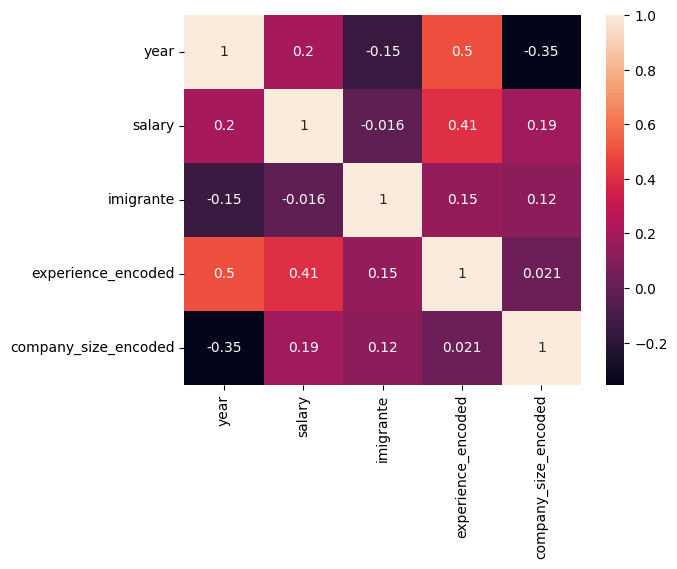

In [20]:
from scipy.stats import pearsonr, spearmanr, kendalltau

for col in cols:
    dados = pearsonr(df['salary'], df[col])
    
    if dados[1] > .05:
        status = 'NÃO SIGNIFICATIVA'
    else:
        status = 'SIGNIFICATIVA'
    print(f'{col.upper():<20} | STATISTICS {dados[0]:>8.4f} | PVALUE {dados[1]:>12.4f} | {status:<20}')
    
sns.heatmap(df.corr(method='pearson'), annot=True);

### 7.3 CORRELAÇÃO DE SPEARMAN

YEAR                 | STATISTICS   0.2945 | PVALUE       0.0011 | SIGNIFICATIVA       
IMIGRANTE            | STATISTICS  -0.0244 | PVALUE       0.7919 | NÃO SIGNIFICATIVA   
EXPERIENCE_ENCODED   | STATISTICS   0.5751 | PVALUE       0.0000 | SIGNIFICATIVA       
COMPANY_SIZE_ENCODED | STATISTICS   0.1013 | PVALUE       0.2729 | NÃO SIGNIFICATIVA   


C:\Users\leona\AppData\Local\Temp\ipykernel_13300\2512110107.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='spearman'), annot=True);


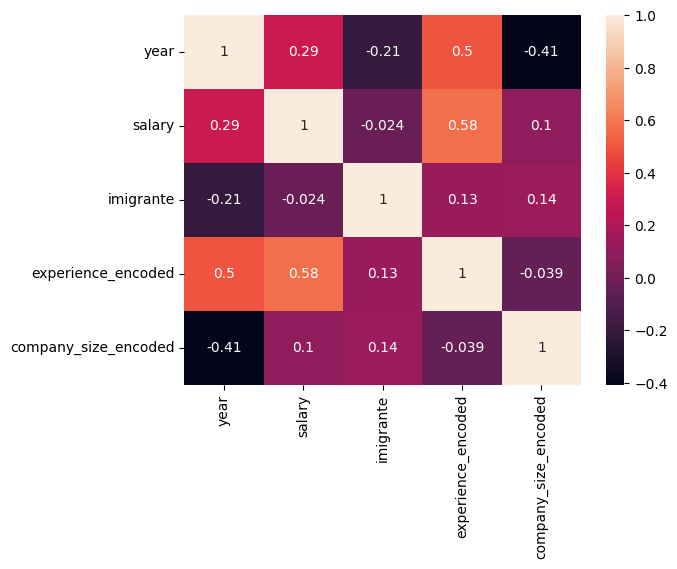

In [21]:
for col in cols:
    dados = spearmanr(df['salary'], df[col])
    
    if dados[1] > .05:
        status = 'NÃO SIGNIFICATIVA'
    else:
        status = 'SIGNIFICATIVA'
    print(f'{col.upper():<20} | STATISTICS {dados[0]:>8.4f} | PVALUE {dados[1]:>12.4f} | {status:<20}')


sns.heatmap(df.corr(method='spearman'), annot=True);

### 7.4 CORRELAÇÃO DE KENDALL

YEAR                 | STATISTICS   0.2338 | PVALUE       0.0014 | SIGNIFICATIVA       
IMIGRANTE            | STATISTICS  -0.0201 | PVALUE       0.7907 | NÃO SIGNIFICATIVA   
EXPERIENCE_ENCODED   | STATISTICS   0.4462 | PVALUE       0.0000 | SIGNIFICATIVA       
COMPANY_SIZE_ENCODED | STATISTICS   0.0810 | PVALUE       0.2703 | NÃO SIGNIFICATIVA   


C:\Users\leona\AppData\Local\Temp\ipykernel_13300\4255815064.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='kendall'), annot=True);


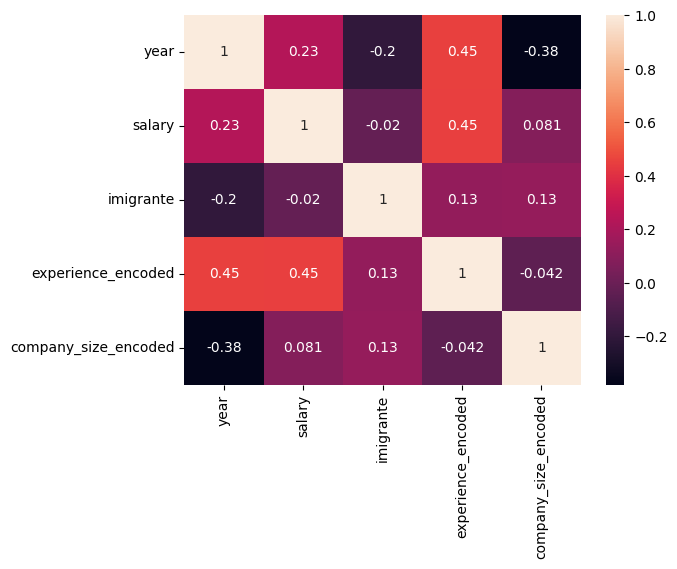

In [22]:
for col in cols:
    dados = kendalltau(df['salary'], df[col])
    
    if dados[1] > .05:
        status = 'NÃO SIGNIFICATIVA'
    else:
        status = 'SIGNIFICATIVA'
    print(f'{col.upper():<20} | STATISTICS {dados[0]:>8.4f} | PVALUE {dados[1]:>12.4f} | {status:<20}')

    
sns.heatmap(df.corr(method='kendall'), annot=True);